<a href="https://colab.research.google.com/github/Arunkumar614/2303A51L48-AIML-BATCH-28/blob/main/Project_Laptop_Price_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
K-Nearest Algorithm

Enter the brand of the laptop: Asus
Enter the processor brand: Intel
Enter the processor name: Core i3
Enter the RAM size in GB: 8
Enter the RAM type: DDR4
Enter the SSD size in GB: 512
Enter the HDD size in GB: 500
Enter the operating system: Windows
Enter the graphic card size in GB: 4
Enter the processor speed in GHz: 3.5
Does the laptop have a touchscreen (Yes/No): Yes
Predicted Price: 59.512000 thousand
Mean Squared Error: 688203559.7226666
Mean Absolute Error: 14393.263030303033
R-squared Score: 0.6468590359894619


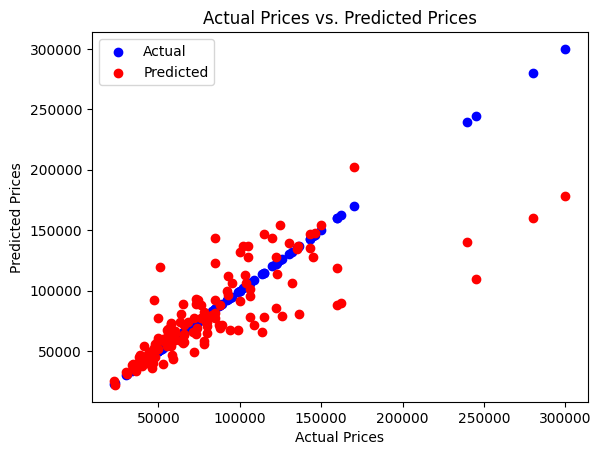

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/finaldata_set.csv')

# Split the dataset into features (X) and target variable (y)
X = data[['brand','processor_brand','processor_name', 'ram_gb', 'ram_type', 'ssd', 'hdd','os', 'graphic_card_gb', 'processor_speed', 'Touchscreen']]
y = data['Price']

# Data preprocessing
X_encoded = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection and training
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as per your preference
model.fit(X_train, y_train)

# Define a function to predict laptop price
def predict_laptop_price(user_input):
    # Preprocess the user input to match the format used for training
    user_input_encoded = pd.get_dummies(pd.DataFrame(user_input, columns=X.columns))

    # Add missing columns if any
    missing_cols = set(X_encoded.columns) - set(user_input_encoded.columns)
    for col in missing_cols:
        user_input_encoded[col] = 0

    # Reorder columns to match the order used for training
    user_input_encoded = user_input_encoded[X_encoded.columns]

    # Scale the input using the same scaler used for training
    user_input_scaled = scaler.transform(user_input_encoded)

    # Predict the price using the trained model
    predicted_price = model.predict(user_input_scaled)
    return predicted_price[0]

# Prompt the user to input laptop components
brand = input("Enter the brand of the laptop: ")
processor_brand = input("Enter the processor brand: ")
processor_name = input("Enter the processor name: ")
ram_gb = int(input("Enter the RAM size in GB: "))
ram_type = input("Enter the RAM type: ")
ssd = int(input("Enter the SSD size in GB: "))
hdd = int(input("Enter the HDD size in GB: "))
os = input("Enter the operating system: ")
graphic_card_gb = int(input("Enter the graphic card size in GB: "))
processor_speed = float(input("Enter the processor speed in GHz: "))
Touchscreen = input("Does the laptop have a touchscreen (Yes/No): ")

# Convert categorical inputs to lowercase
brand = brand.lower()
processor_brand = processor_brand.lower()
processor_name = processor_name.lower()
ram_type = ram_type.lower()
os = os.lower()
Touchscreen = Touchscreen.lower()

# Create user input list
user_input = [[brand, processor_brand, processor_name, ram_gb, ram_type, ssd, hdd, os, graphic_card_gb, processor_speed, Touchscreen]]

# Predict laptop price
predicted_price = predict_laptop_price(user_input)
#print("Predicted Price:", predicted_price)

# Check the magnitude of the predicted price and display accordingly
if predicted_price >= 1e6:  # If predicted price is in millions (or lakhs)
    predicted_price_str = "{:.6f}".format(predicted_price / 1e5) + " lakhs"
else:  # If predicted price is in thousands
    predicted_price_str = "{:.6f}".format(predicted_price / 1e3) + " thousand"

print("Predicted Price:", predicted_price_str)


# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# Visualize predicted vs. actual prices
# Visualize predicted vs. actual prices with different colors
# Visualize predicted vs. actual prices with different colors
plt.scatter(y_test, y_test, c='blue', label='Actual')  # Plot actual prices in blue
plt.scatter(y_test, y_pred, c='red', label='Predicted')  # Plot predicted prices in red
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()
plt.show()





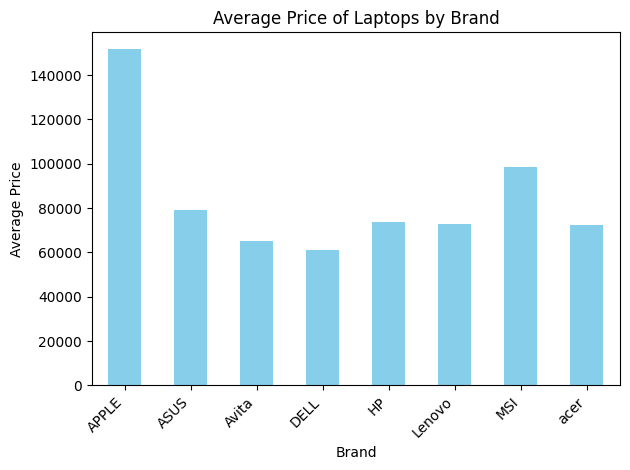

In [ ]:
# Calculate the average price of laptops for each brand
avg_price_by_brand = data.groupby('brand')['Price'].mean()

# Plotting the bar graph
avg_price_by_brand.plot(kind='bar', color='skyblue')
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Price of Laptops by Brand")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


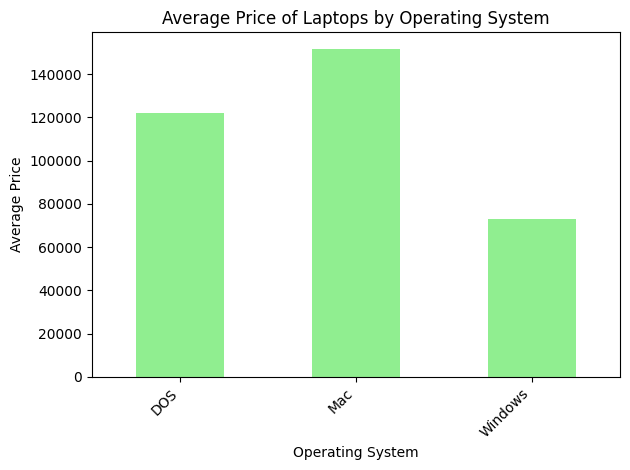

In [ ]:
# Calculate the average price of laptops for each operating system
avg_price_by_os = data.groupby('os')['Price'].mean()

# Plotting the bar graph
avg_price_by_os.plot(kind='bar', color='lightgreen')
plt.xlabel("Operating System")
plt.ylabel("Average Price")
plt.title("Average Price of Laptops by Operating System")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


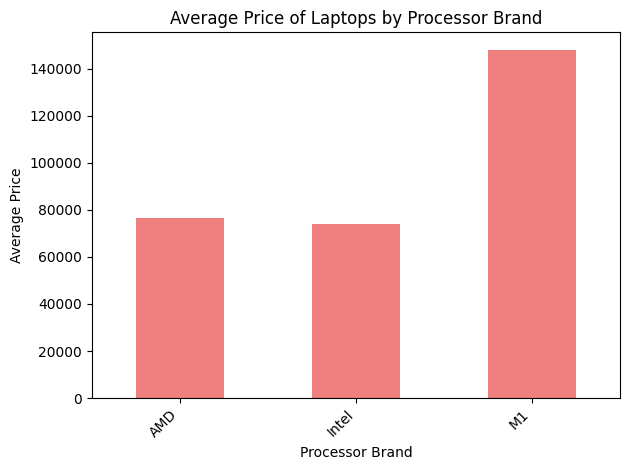

In [ ]:
# Calculate the average price of laptops for each processor brand
avg_price_by_processor_brand = data.groupby('processor_brand')['Price'].mean()

# Plotting the bar graph
avg_price_by_processor_brand.plot(kind='bar', color='lightcoral')
plt.xlabel("Processor Brand")
plt.ylabel("Average Price")
plt.title("Average Price of Laptops by Processor Brand")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


In [ ]:
Random Forest

Enter the brand of the laptop: Asus
Enter the processor brand: intel
Enter the processor name: core i3
Enter the RAM size in GB: 4
Enter the RAM type: ddr4
Enter the SSD size in GB: 512
Enter the HDD size in GB: 1024
Enter the operating system: windows
Enter the graphic card size in GB: 4
Enter the processor speed in GHz: 3.5
Does the laptop have a touchscreen (Yes/No): Yes
Predicted Price: 123.351242 thousands
Mean Squared Error: 728401636.0320586
Mean Absolute Error: 15023.863476870438
R-squared Score: 0.6262320176912879


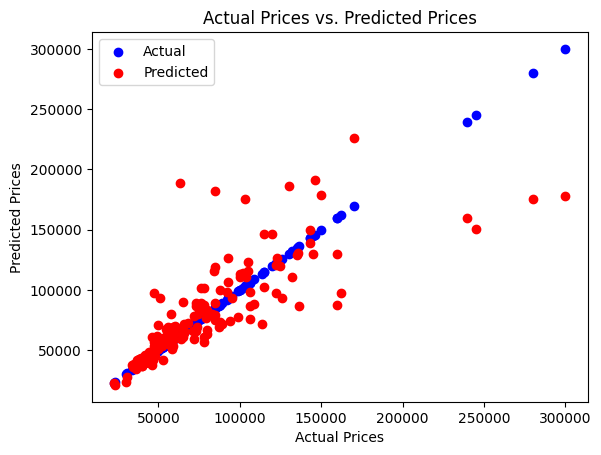

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/finaldata_set.csv')

# Split the dataset into features (X) and target variable (y)
X = data[['brand','processor_brand','processor_name', 'ram_gb', 'ram_type', 'ssd', 'hdd','os', 'graphic_card_gb', 'processor_speed', 'Touchscreen']]
y = data['Price']

# Data preprocessing
X_encoded = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define a function to predict laptop price
def predict_laptop_price(user_input):
    # Preprocess the user input to match the format used for training
    user_input_encoded = pd.get_dummies(pd.DataFrame(user_input, columns=X.columns))

    # Add missing columns if any
    missing_cols = set(X_encoded.columns) - set(user_input_encoded.columns)
    for col in missing_cols:
        user_input_encoded[col] = 0

    # Reorder columns to match the order used for training
    user_input_encoded = user_input_encoded[X_encoded.columns]

    # Scale the input using the same scaler used for training
    user_input_scaled = scaler.transform(user_input_encoded)

    # Predict the price using the trained model
    predicted_price = model.predict(user_input_scaled)
    return predicted_price[0]

# Prompt the user to input laptop components
brand = input("Enter the brand of the laptop: ")
processor_brand = input("Enter the processor brand: ")
processor_name = input("Enter the processor name: ")
ram_gb = int(input("Enter the RAM size in GB: "))
ram_type = input("Enter the RAM type: ")
ssd = int(input("Enter the SSD size in GB: "))
hdd = int(input("Enter the HDD size in GB: "))
os = input("Enter the operating system: ")
graphic_card_gb = int(input("Enter the graphic card size in GB: "))
processor_speed = float(input("Enter the processor speed in GHz: "))
Touchscreen = input("Does the laptop have a touchscreen (Yes/No): ")

# Convert categorical inputs to lowercase
brand = brand.lower()
processor_brand = processor_brand.lower()
processor_name = processor_name.lower()
ram_type = ram_type.lower()
os = os.lower()
Touchscreen = Touchscreen.lower()

# Create user input list
user_input = [[brand, processor_brand, processor_name, ram_gb, ram_type, ssd, hdd, os, graphic_card_gb, processor_speed, Touchscreen]]

# Predict laptop price
predicted_price = predict_laptop_price(user_input)
#print("Predicted Price:", predicted_price)

# Check the magnitude of the predicted price and display accordingly
if predicted_price >= 1e6:  # If predicted price is in millions (or lakhs)
    predicted_price_str = "{:.6f}".format(predicted_price / 1e5) + " lakhs"
else:  # If predicted price is in thousands
    predicted_price_str = "{:.6f}".format(predicted_price / 1e3) + " thousands"

print("Predicted Price:", predicted_price_str)


# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# Visualize predicted vs. actual prices
# Visualize predicted vs. actual prices with different colors
plt.scatter(y_test, y_test, c='blue', label='Actual')  # Plot actual prices in blue
plt.scatter(y_test, y_pred, c='red', label='Predicted')  # Plot predicted prices in red
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()
plt.show()


In [ ]:
Decision Tree

Enter the brand of the laptop: asus
Enter the processor brand: intel
Enter the processor name: core i3
Enter the RAM size in GB: 4
Enter the RAM type: ddr4
Enter the SSD size in GB: 512
Enter the HDD size in GB: 1024
Enter the operating system: Windows
Enter the graphic card size in GB: 4
Enter the processor speed in GHz: 3.5
Does the laptop have a touchscreen (Yes/No): yes
Predicted Price: 114.693050 thousands
Mean Squared Error: 998434653.2057194
Mean Absolute Error: 19233.33193249478
R-squared Score: 0.4876687704482644


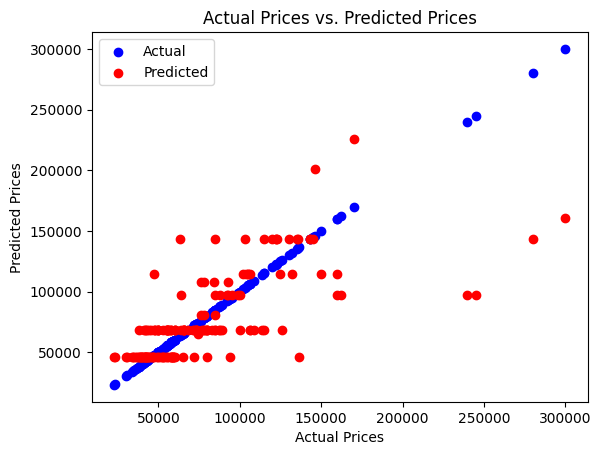

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/finaldata_set.csv')

# Split the dataset into features (X) and target variable (y)
X = data[['brand','processor_brand','processor_name', 'ram_gb', 'ram_type', 'ssd', 'hdd','os', 'graphic_card_gb', 'processor_speed', 'Touchscreen']]
y = data['Price']

# Data preprocessing
X_encoded = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection and training
model = DecisionTreeRegressor(max_depth=5)  # You can adjust the max depth as per your preference
model.fit(X_train, y_train)

# Define a function to predict laptop price
def predict_laptop_price(user_input):
    # Preprocess the user input to match the format used for training
    user_input_encoded = pd.get_dummies(pd.DataFrame(user_input, columns=X.columns))

    # Add missing columns if any
    missing_cols = set(X_encoded.columns) - set(user_input_encoded.columns)
    for col in missing_cols:
        user_input_encoded[col] = 0

    # Reorder columns to match the order used for training
    user_input_encoded = user_input_encoded[X_encoded.columns]

    # Scale the input using the same scaler used for training
    user_input_scaled = scaler.transform(user_input_encoded)

    # Predict the price using the trained model
    predicted_price = model.predict(user_input_scaled)
    return predicted_price[0]

# Prompt the user to input laptop components
brand = input("Enter the brand of the laptop: ")
processor_brand = input("Enter the processor brand: ")
processor_name = input("Enter the processor name: ")
ram_gb = int(input("Enter the RAM size in GB: "))
ram_type = input("Enter the RAM type: ")
ssd = int(input("Enter the SSD size in GB: "))
hdd = int(input("Enter the HDD size in GB: "))
os = input("Enter the operating system: ")
graphic_card_gb = int(input("Enter the graphic card size in GB: "))
processor_speed = float(input("Enter the processor speed in GHz: "))
Touchscreen = input("Does the laptop have a touchscreen (Yes/No): ")

# Convert categorical inputs to lowercase
brand = brand.lower()
processor_brand = processor_brand.lower()
processor_name = processor_name.lower()
ram_type = ram_type.lower()
os = os.lower()
Touchscreen = Touchscreen.lower()

# Create user input list
user_input = [[brand, processor_brand, processor_name, ram_gb, ram_type, ssd, hdd, os, graphic_card_gb, processor_speed, Touchscreen]]

# Predict laptop price
predicted_price = predict_laptop_price(user_input)
#print("Predicted Price:", predicted_price)

# Check the magnitude of the predicted price and display accordingly
if predicted_price >= 1e6:  # If predicted price is in millions (or lakhs)
    predicted_price_str = "{:.6f}".format(predicted_price / 1e5) + " lakhs"
else:  # If predicted price is in thousands
    predicted_price_str = "{:.6f}".format(predicted_price / 1e3) + " thousands"

print("Predicted Price:", predicted_price_str)


# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# Visualize predicted vs. actual prices
# Visualize predicted vs. actual prices with different colors
plt.scatter(y_test, y_test, c='blue', label='Actual')  # Plot actual prices in blue
plt.scatter(y_test, y_pred, c='red', label='Predicted')  # Plot predicted prices in red
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()
plt.show()
